In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Field correlations at diffuser plate

With a Gaussian model for the first order phase distribution

$p_\varphi (\varphi) = \frac{1}{\sqrt{2 \pi \sigma_\varphi}}e^{-\varphi^2 / (2 \sigma_\varphi^2)}$

and a Gaussian model for the second order spatial phase correlation

$\left< \varphi (\mathbf{x}_1) \varphi (\mathbf{x}_2) \right> = \mu_\varphi(r \equiv |\mathbf{x_1} - \mathbf{x_2}|) = e^{-r^2 / r_c^2}$,

the resulting field correlation becomes

$\mu_A (r) = \exp \left( -\sigma_\varphi^2 \left( 1 - e^{-r^2 / r_c^2} \right) \right)$.

For large $\sigma_\varphi \gtrsim \pi$, the short range (around peak) behaviour can be approximated as

$\mu_A (r \lesssim s_c) \approx e^{-r^2 / s_c^2}, s_c = \frac{r_c}{\sigma_\varphi}$.

The long range behaviour (i.e. the residual correlations) is governed by

$\mu_A (r \gg s_c) \approx e^{-\sigma_\varphi^2}$.

In [3]:
phases = np.array([0.3, 0.5, 1.0, 2.0]) * np.pi
r_sc = np.linspace(0, 2, 401)
r_rc = np.array([r_sc * ph for ph in phases])
coh = np.array([
    np.exp(-ph**2 * (1 - np.exp(-(r_sc / ph)**2)))
    for ph in phases
])

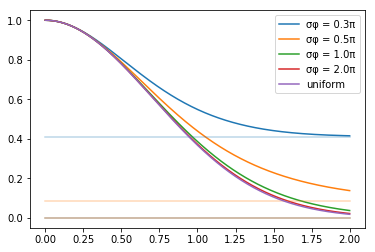

In [4]:
for it, y in enumerate(coh):
    plt.plot(r_sc, y,
             label="σφ = {:.1f}π".format(phases[it] / np.pi),
             color="C{:d}".format(it))
for it, y in enumerate(coh):
    plt.plot(r_sc, np.full_like(r_sc, np.exp(-phases[it]**2)),
             color="C{:d}".format(it), alpha=0.3)
plt.plot(r_sc, np.exp(-r_sc**2), label="uniform",
         color="C{:d}".format(len(coh)))
plt.legend()
plt.show()